In [234]:
#pandas.util.testing import assert_frame_equal
#Campeonato Quantamental
#Pegando dados P/L
import requests
import pandas as pd
import io
import json
import re
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
from datetime import *
#from pandas.util.testing import assert_frame_equal

headers = {
    'authority': 'www.oceans14.com.br',
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Mobile Safari/537.36',
    'x-requested-with': 'XMLHttpRequest',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    # coloque aqui a url de qualquer canto que seja do site oceans14
    'referer': 'https://www.oceans14.com.br/acoes/taesa/taee11/balanco-dividendos',
    'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7,la;q=0.6',
    'cookie': 'ASP.NET_SessionId=jypd15qvl1yu3ypbgqzecxjj; uid=0EAB27F50DB06E1775959795C4949E2D; origem=https://l.facebook.com/; contadorViewsAcoes=3',
}

params = (
    ######IDENTIFICAR TICKER DA ACAO######
    ('papel', 'TAEE11'),
    ('periodo', '10a'),
)

response = requests.get('https://www.oceans14.com.br/rendaVariavel/respostaAjax/gHistoricoPl.aspx', headers=headers, params=params)
dframe = pd.json_normalize(response.json())
jason = response.text
normal = json.loads(jason)
datas = []
valores = []
for row in normal["rows"]:
    date = row['c'][0]['v']
    formatedDate = re.search(r"(?<=Date\()[^\):]+(?=:?\))", date).group(0)
    simpleData = formatedDate.replace(',', '-').replace(' ', '')
    separatedData = simpleData.split('-')
    correctDataList = ''
    for number in separatedData:
        if number != '0':
            correctDataList += ("%02d" % int(number)) + "-"
    correctDataList = correctDataList[:-1]
    datas.append(correctDataList)
    valores.append(row['c'][1]['v'])
frameDict = {
    "Date": datas,
    "valores": valores
}
dframe = pd.DataFrame(data=frameDict)
dframe['valores'] = dframe['valores'].values.tolist()
dframe['valores'] = valores
dframe

,Date,valores
0,2012-04-29,43.49
1,2012-04-30,40.50
2,2012-04-31,36.52
3,2012-05-01,41.16
4,2012-05-04,41.83
...,...,...
1990,2020-06-08,8.24
1991,2020-06-09,8.15
1992,2020-06-10,8.13
1993,2020-06-13,8.12


In [235]:
#tickers = ['ITUB3.SA'] #IDENTIFICAR TICKER DA ACAO######
acao = 'ITUB3'
start_date = '2010-06-16'
end_date = '2020-06-9'
df = data.DataReader('TAEE11.SA', 'yahoo', start_date, end_date) #digitar ticker
df['Preco_Lucro'] = valores
tabela = df[['Close', 'Preco_Lucro']]

#tabela.set_index('Date',inplace=True)
#tabela
df

ValueError: Length of values does not match length of index

In [169]:
import talib
import matplotlib.pyplot as plt
import sys

upperband, middleband, lowerband = talib.BBANDS(tabela['Preco_Lucro'], timeperiod=200, nbdevup=3, nbdevdn=3, matype=0)
tabela['upperband'] = upperband
tabela['middleband'] = middleband
tabela['lowerband'] = lowerband
tabela

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Close,Preco_Lucro,upperband,middleband,lowerband
Date,,,,,
2010-06-16,12.717700,10.72,NaN,NaN,NaN
2010-06-17,12.599300,10.87,NaN,NaN,NaN
2010-06-18,12.613000,10.99,NaN,NaN,NaN
2010-06-21,12.613000,11.01,NaN,NaN,NaN
2010-06-22,12.613000,11.33,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-03,24.500000,10.68,15.268979,11.10695,6.944921
2020-06-04,25.200001,10.43,15.263161,11.10060,6.938039
2020-06-05,25.730000,10.59,15.259678,11.09635,6.933022


In [ ]:
tabela = tabela.dropna()
#tabela.set_index('Date',inplace=True)

In [171]:
tabela

,Close,Preco_Lucro,upperband,middleband,lowerband
Date,,,,,
2011-04-08,14.498100,10.39,12.622400,10.88790,9.153400
2011-04-11,14.570900,10.45,12.623165,10.88655,9.149935
2011-04-12,14.407000,10.59,12.622896,10.88515,9.147404
2011-04-13,14.343300,10.34,12.623320,10.88190,9.140480
2011-04-14,14.010900,10.37,12.623265,10.87870,9.134135
...,...,...,...,...,...
2020-06-03,24.500000,10.68,15.268979,11.10695,6.944921
2020-06-04,25.200001,10.43,15.263161,11.10060,6.938039
2020-06-05,25.730000,10.59,15.259678,11.09635,6.933022


In [181]:
ibov = data.DataReader('^BVSP', 'yahoo', '2011-04-08', '2020-06-15')
ibov

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-04-08,69430.0,68472.0,69180.0,68718.0,2111400.0,68718.0
2011-04-11,69177.0,68029.0,68719.0,68164.0,2173800.0,68164.0
2011-04-12,68153.0,66721.0,68153.0,66896.0,2525800.0,66896.0
2011-04-13,67411.0,66251.0,66909.0,66486.0,2515200.0,66486.0
2011-04-14,67042.0,66090.0,66483.0,66279.0,2259000.0,66279.0
...,...,...,...,...,...,...
2020-06-08,97693.0,94635.0,94640.0,97645.0,11096500.0,97645.0
2020-06-09,97644.0,95386.0,97644.0,96747.0,11278800.0,96747.0
2020-06-10,97646.0,94665.0,96747.0,94686.0,11739600.0,94686.0


In [182]:
#Logico

def buy_sell(tabela): 
    compras = []
    vendas = []
    #tickers = 'AAPL' ######IDENTIFICAR TICKER DA ACAO######
    flag = 3
    #flag = 1 comprado
    #flag = 0 vendeu
    
    for i in range(len(tabela)):
        ###Testa se é para Comprar
        if tabela['Preco_Lucro'][i] < tabela['lowerband'][i]:   
          if flag != 1:
            compras.append(tabela['Close'][i])
            vendas.append(np.nan)
            flag = 1
          else:
            compras.append(np.nan)
            vendas.append(np.nan)
        ###Testa se é para Vender
        elif (tabela['Preco_Lucro'][i] > tabela['upperband'][i]):
          if ((flag != 0) & (flag != 3)):
            compras.append(np.nan)
            vendas.append(tabela['Close'][i])
            flag = 0
          else:
            compras.append(np.nan)
            vendas.append(np.nan)
        ###Caso nem compre nem vende
        else:
          compras.append(np.nan)
          vendas.append(np.nan)
        
    return (compras, vendas)



In [183]:
compras,vendas = buy_sell(tabela)
tabela['compra'] = compras
tabela['venda'] = vendas
tabela
#compras

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Preco_Lucro,upperband,middleband,lowerband,compra,venda
Date,,,,,,,
2011-04-08,14.498100,10.39,12.622400,10.88790,9.153400,NaN,NaN
2011-04-11,14.570900,10.45,12.623165,10.88655,9.149935,NaN,NaN
2011-04-12,14.407000,10.59,12.622896,10.88515,9.147404,NaN,NaN
2011-04-13,14.343300,10.34,12.623320,10.88190,9.140480,NaN,NaN
2011-04-14,14.010900,10.37,12.623265,10.87870,9.134135,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-03,24.500000,10.68,15.268979,11.10695,6.944921,NaN,NaN
2020-06-04,25.200001,10.43,15.263161,11.10060,6.938039,NaN,NaN
2020-06-05,25.730000,10.59,15.259678,11.09635,6.933022,NaN,NaN


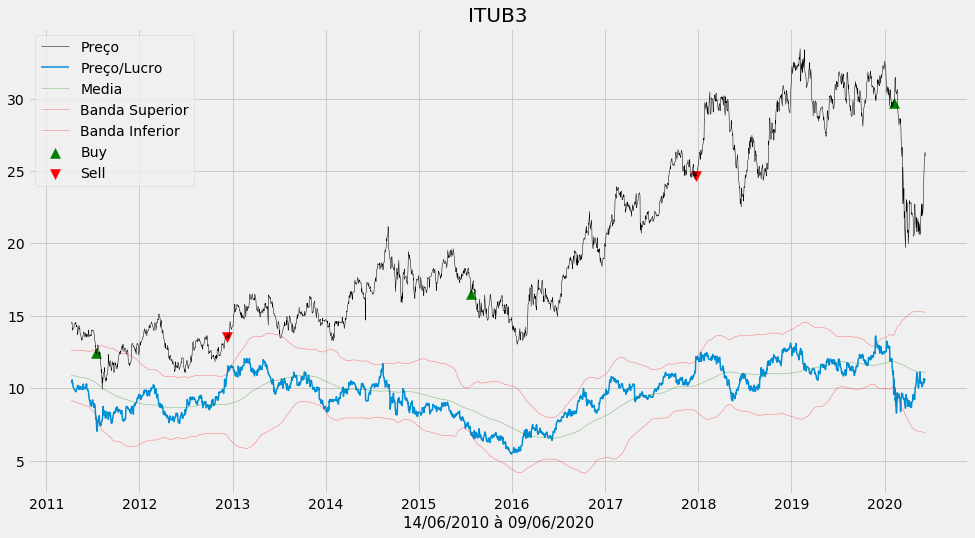

In [184]:
#tickers = 'AAPL' ######IDENTIFICAR TICKER DA ACAO######
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(tabela['Close'], label = 'Preço',alpha = 1, linewidth=0.5, color='black')
plt.plot(tabela['Preco_Lucro'], label = 'Preço/Lucro', alpha = 1, linewidth=1.5)
plt.plot(tabela['middleband'], label = 'Media',alpha = 0.5, linewidth=0.5, color='green')
plt.plot(tabela['upperband'], label = 'Banda Superior',alpha = 0.5, linewidth=0.5, color='red')
plt.plot(tabela['lowerband'], label = 'Banda Inferior',alpha = 0.5, linewidth=0.5, color='red')
plt.scatter(tabela.index, tabela['compra'], label = 'Buy', marker='^',color = 'green', s=100)
plt.scatter(tabela.index, tabela['venda'], label = 'Sell',marker="v",color = 'red', s=100)
plt.xlabel('14/06/2010 à 09/06/2020', fontsize =15)
plt.title(acao, fontsize=20)
plt.legend(loc='best')

In [219]:

def backtest_strategy(tabela, capital, benchmark): #volatility_threshold vai ajudar a definir o que é uma volatilidade baixa
    
                #pega na tabela price[simbolo] =0 e tbm coloca uma coluna cash
    df_init   = (tabela['Close']*0).to_frame().assign(cash = 0)#lida com a posicao no inicio do dia
    df_update = (tabela['Close']*0).to_frame().assign(cash = 0)#lida com as mudanças de posicao durante o dia
    df_end    = (tabela['Close']*0).to_frame().assign(cash = 0)#lida com a posicao no fim do dia
    
    df_init.iloc[0, df_init.columns.get_loc('cash')] = capital#colocando capital incial na primeira linha do data frameINICIAL
    df_end.iloc[0, df_end.columns.get_loc('cash')]   = capital#colocando capital incial na primeira linha do data frameFINAL dia
    
    calendar = pd.Series(tabela.index).iloc[1:]#pulando primeiro dia, que a gente nao faz trading e pegando todos od dias
    
    Numero_acoes_anterior=0
    Quantidade_em_caixa_anterior=capital
    for date in calendar:
        prev_date = df_init.index[df_init.index<date][-1]#p/ saber qual é o dia anterior
        
        df_init.loc[date, :] = df_end.loc[prev_date, :]#fazendo inicio dia ser igual ao final dia do DiaAnterior
        
        port_value = df_init.loc[date, 'Close'] * tabela.loc[date, 'Close'] + df_init.loc[date, 'cash']#valor do portifolio no inicio do dia= posiciao inicio dia*preço + valor em caixa
        
        #fazendo a trasicao entre caixa e comprado
        
        if tabela.loc[date, 'Preco_Lucro'] > tabela.loc[date, 'upperband']: # 
            df_end.loc[date, 'Close']=0
            Numero_acoes_anterior = 0
            df_end.loc[date, 'cash'] = port_value
            Quantidade_em_caixa_anterior = port_value
        elif (tabela.loc[date, 'Preco_Lucro'] < tabela.loc[date,'lowerband']): # 
            df_end.loc[date, 'Close'] = port_value/tabela.loc[date, 'Close']
            Numero_acoes_anterior = port_value/tabela.loc[date, 'Close']#divide pelo preco p colocar so a qtd alocada e n o valor
            df_end.loc[date, 'cash']=0
            Quantidade_em_caixa_anterior = 0
        else:
            df_end.loc[date, 'Close'] = Numero_acoes_anterior
            df_end.loc[date, 'cash'] = Quantidade_em_caixa_anterior
            
        df_update.loc[date] = df_end.loc[date] - df_init.loc[date]#passando a diferencao p o dfUpdate
    
    #comparação com benchmark
    #portval = pd.DataFrame()                  
    portval= (df_end * tabela.assign(cash = 1)[['Close', 'cash']]).sum(axis = 1).to_frame().rename(columns = {0:'strategy'})#trocando qdt alocada pelo valor alocado e juntando as duas colunas- para dar uma coluna com o valor final de cada dia (strategy) 
    portval['benchmark'] = benchmark['Close']
    portval['ITUB'] = tabela['Close']
    portval = (portval/portval.iloc[0].values) #normalizando o valor inicial
    
    return (portval)
    

In [225]:
res = backtest_strategy(tabela = tabela, capital = 10000, benchmark = ibov)
#res.plot()
#type(res)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(res['strategy'], label = 'Estrategia',alpha = 1, linewidth=0.5, color='blue')
plt.plot(res['benchmark'], label = 'Ibov',alpha = 1, linewidth=0.7, color='red')
plt.plot(res['ITUB'], label = 'ITUB3',alpha = 1, linewidth=0.7, color='black')


#plt.xlabel('14/06/2010 à 09/06/2020', fontsize =15)
plt.ylabel('Valor Acumulado')
plt.title(acao, fontsize=20)
plt.legend(loc='best')


,strategy,benchmark,ITUB
Date,,,
2011-04-08,1.0,1.000000,1.000000
2011-04-11,1.0,0.991938,1.005021
2011-04-12,1.0,0.973486,0.993716
2011-04-13,1.0,0.967519,0.989323
2011-04-14,1.0,0.964507,0.966396


In [19]:
#Calculo retorno da estrategia
#tabela['retorno']=tabela['Close'].pct_change()
#retorno = tabela['retorno'].sum()

def retorno(retorno):
    buy = []
    sell = []

    for i in range(df['compra'][i]):
        if tabela['compra'][i] >= 1: 
            buy.append(tabela['Close'][i])
        else:
            None
        if tabela['venda'][i] >= 1:   
            sell.append(tabela['Close'][i])
        else:
            None
            
    return (buy, sell)
